In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Creating ML models/Boston.csv',index_col=0)

In [14]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
data.shape

(506, 14)

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [18]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(1.6749999999999972, 0.5, 'median value of owner occupied homes in $1000s')

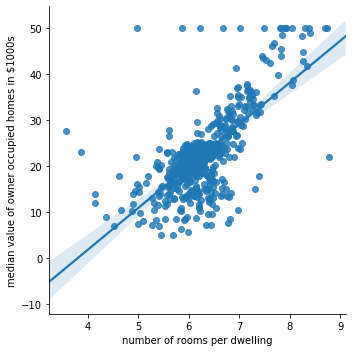

In [20]:
sns.lmplot('rm','medv',data)
plt.xlabel("number of rooms per dwelling")
plt.ylabel("median value of owner occupied homes in $1000s")

Text(10.049999999999997, 0.5, 'median value of owner occupied homes in $1000s')

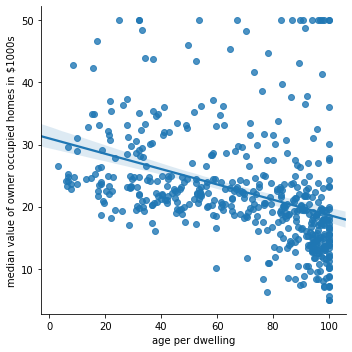

In [21]:
sns.lmplot('age','medv',data)
plt.xlabel("age per dwelling")
plt.ylabel("median value of owner occupied homes in $1000s")

Text(10.049999999999997, 0.5, 'median value of owner occupied homes in $1000s')

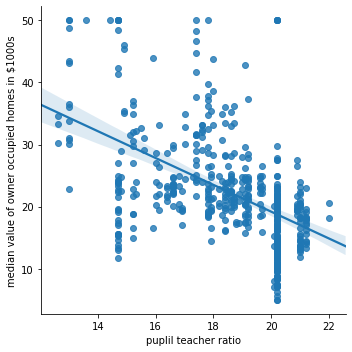

In [22]:
sns.lmplot('ptratio','medv',data)
plt.xlabel("puplil teacher ratio")
plt.ylabel("median value of owner occupied homes in $1000s")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
x=data.drop('medv',axis=1)
y=data['medv']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape,y_train.shape

((404, 13), (404,))

In [27]:
x_test.shape,y_test.shape

((102, 13), (102,))

In [28]:
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=linear_regression.predict(x_test)

In [31]:
df_y=pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
df_y.sample(10)

,y_test,y_pred
470,20.1,17.732526
109,19.8,22.373233
114,18.7,20.960847
155,17.0,22.902563
46,19.3,22.419407
332,17.1,20.789705
427,10.2,15.885454
401,5.6,11.155366
452,15.2,18.712464
364,16.8,19.277741


In [32]:
print("Training score",linear_regression.score(x_train,y_train))

Training score 0.7730135569264233


In [33]:
from sklearn.metrics import r2_score
print("testing score",r2_score(y_test,y_pred))

testing score 0.5892223849182523


Using Ordinary Analytics

In [34]:
import numpy as np
import statsmodels.api as sm

In [35]:
x=np.array(x)

In [36]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [37]:
x=sm.add_constant(x)
x[:5]

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00,
        5.3800e-01, 6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00,
        2.9600e+02, 1.5300e+01, 3.9690e+02, 4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9283e+02, 4.0300e+00],
       [1.0000e+00, 3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00,
        4.5800e-01, 6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00,
        2.2200e+02, 1.8700e+01, 3.9463e+02, 2.9400e+00],
       [1.0000e+00, 6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00,
        4.5800e-01, 7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00,
        2.2200e+02, 1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [38]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        15:08:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""